<a href="https://colab.research.google.com/github/vic1030/Data_Science_Learning/blob/main/Model_Selection(confusion_matrix%2Cthreshold%2CROC)%2C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

### 数据集读取
- Mnist数据是图像数据：(28,28,1)的灰度图

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist


{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

![title](./img/9.png)

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
# 洗牌操作
import numpy as np
# Split the data into training and test sets
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

# Convert to numpy arrays (if they are not already)
X_train = np.array(X_train)
y_train = np.array(y_train)

# Shuffle the training set
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Print to confirm the operation
print("Data shuffled successfully")

Data shuffled successfully


In [12]:
shuffle_index

array([52552,  6089,  1411, ...,  3166, 12018, 47875])

### 交叉验证

![title](./img/5.png)

![title](./img/7.png)

In [13]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [17]:
y_train_5[:10:]

array([False, False, False, False, False, False, False, False,  True,
       False])

In [18]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=5,random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(max_iter=5, random_state=42)

In [44]:
# Make a prediction for the 30000th instance in the dataset using iloc if X is a DataFrame
prediction = sgd_clf.predict([X.iloc[30000]])

# Print the prediction
print("Prediction for instance 30000:", prediction)

Prediction for instance 30000: [False]


In [45]:
y[30000]

3

In [46]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.95905, 0.96275, 0.96705])

In [47]:
X_train.shape

(60000, 784)

In [48]:
y_train_5.shape

(60000,)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_train_5,y_train_pred))

              precision    recall  f1-score   support

       False       0.98      0.98      0.98     54579
        True       0.81      0.76      0.79      5421

    accuracy                           0.96     60000
   macro avg       0.90      0.87      0.88     60000
weighted avg       0.96      0.96      0.96     60000



### Confusion Matrix-混淆矩阵

![title](./img/8.png)

In [49]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [50]:
y_train_pred.shape

(60000,)

In [51]:
X_train.shape

(60000, 784)

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53638,   941],
       [ 1282,  4139]])

negative class  [[ **true negatives** , **false positives** ],

positive class  [ **false negatives** , **true positives** ]]

* true negatives:  53,272个数据被正确的分为非5类别
* false positives：1307张被错误的分为5类别

* false negatives：1077张错误的分为非5类别
* true positives： 4344张被正确的分为5类别

一个完美的分类器应该只有**true positives** 和 **true negatives**, 即主对角线元素不为0，其余元素为0

### Precision and Recall


### **$ precision = \frac {TP} {TP + FP} $**


### **$ recall = \frac {TP} {TP + FN} $**

![title](./img/1.png)

In [42]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)

0.8147637795275591

In [43]:
recall_score(y_train_5,y_train_pred)

0.7635122671093895

将**Precision** 和 **Recall**结合到一个称为**F1 score** 的指标,调和平均值给予低值更多权重。 因此，如果召回和精确度都很高，分类器将获得高F 1分数。

### $ F_1  = $ $2\over {1\over precision}+{1\over recall} $ $=$ $2×$ $precision×recall\over precision+recall $ $=$ $TP\over {TP}+{FN + FP\over 2}$

In [41]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7883058756308924

### 阈值对结果的影响

![title](./img/2.png)

In [ ]:
y_scores = sgd_clf.decision_function([X[35000]])
y_scores

array([43349.73739616])

In [ ]:
t = 50000
y_pred = (y_scores > t)
y_pred

array([False])

Scikit-Learn不允许直接设置阈值，但它可以得到决策分数，调用其**decision_function（）**方法，而不是调用分类器的**predict（）**方法，该方法返回每个实例的分数，然后使用想要的**阈值**根据这些分数进行预测：

In [56]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [57]:
y_scores[:10]

array([ -361574.43116601,  -352735.28271253,  -420706.76515772,
        -491327.16625424,  -140825.91997939, -1388295.45962882,
       -1362503.49051455,  -247823.61648535,   297351.9316517 ,
        -128042.3737926 ])

In [58]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [59]:
y_train_5.shape

(60000,)

In [60]:
thresholds.shape

(60000,)

In [61]:
precisions[:10]

array([0.09035   , 0.09035151, 0.09035301, 0.09035452, 0.09035602,
       0.09035753, 0.09035904, 0.09036054, 0.09036205, 0.09036355])

In [62]:
precisions.shape

(60001,)

In [63]:
recalls.shape

(60001,)

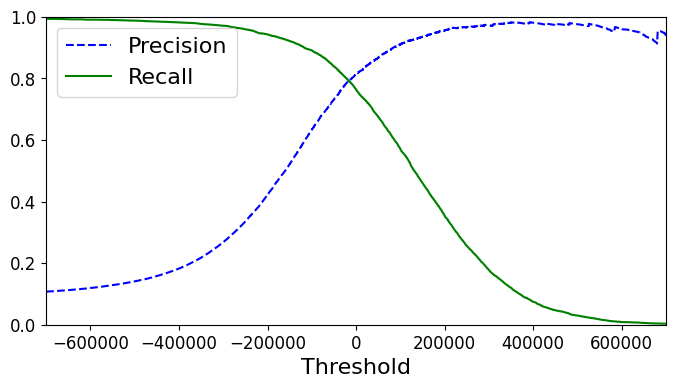

In [64]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,
             precisions[:-1],
            "b--",
            label="Precision")

    plt.plot(thresholds,
             recalls[:-1],
            "g-",
            label="Recall")
    plt.xlabel("Threshold",fontsize=16)
    plt.legend(loc="upper left",fontsize=16)
    plt.ylim([0,1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.xlim([-700000, 700000])
plt.show()

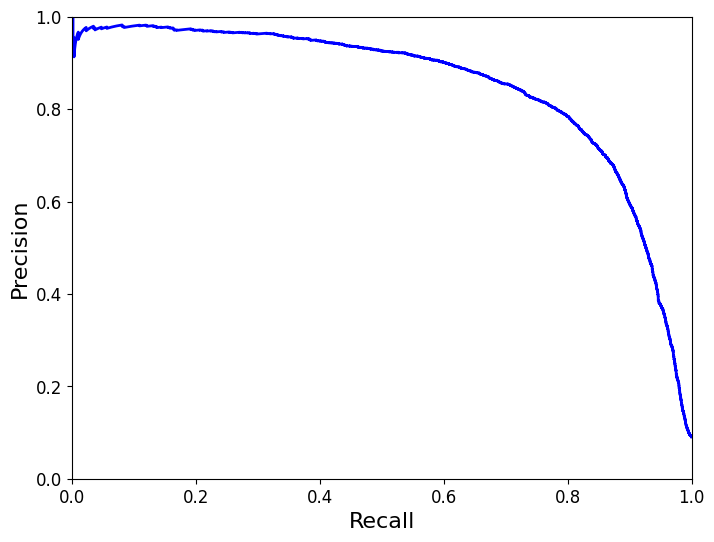

In [65]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls,
             precisions,
             "b-",
             linewidth=2)

    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

### ROC curves
**receiver operating characteristic (ROC)** 曲线是二元分类中的常用评估方法
* 它与精确度/召回曲线非常相似，但ROC曲线不是绘制精确度与召回率，而是绘制**true positive rate(TPR)** 与**false positive rate(FPR)**

* 要绘制ROC曲线，首先需要使用**roc_curve（）**函数计算各种阈值的**TPR和FPR**：

TPR = TP / (TP + FN) (Recall)

FPR = FP / (FP + TN)

In [66]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

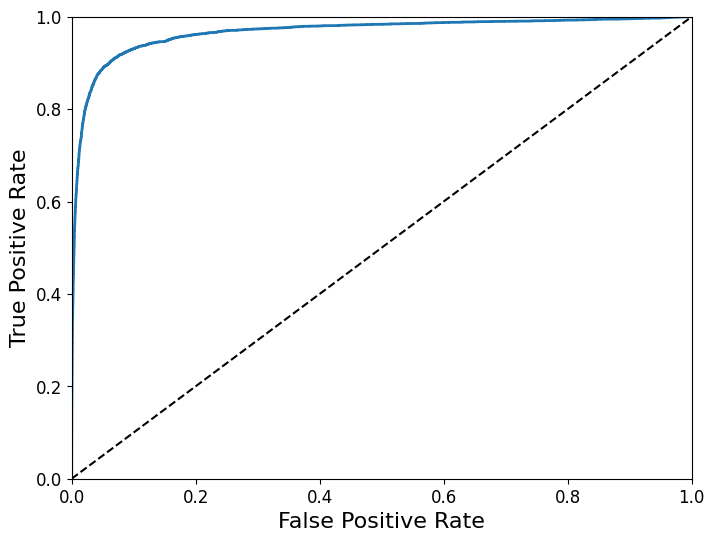

In [67]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

**虚线表示纯随机分类器的ROC曲线**; 一个好的分类器尽可能远离该线（朝左上角）。

比较分类器的一种方法是测量曲线下面积（AUC）。完美分类器的ROC AUC**等于1**，而纯随机分类器的ROC AUC**等于0.5**。 Scikit-Learn提供了计算ROC AUC的函数：

In [68]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9667771104267155